In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [31]:
df=pd.read_csv('driver-data.csv')
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [33]:
scaler=MinMaxScaler()
df[['mean_dist_day','mean_over_speed_perc']]=scaler.fit_transform(df[['mean_dist_day','mean_over_speed_perc']])
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,0.243032,0.28
1,3423313212,0.161425,0.25
2,3423313724,0.213809,0.27
3,3423311373,0.175208,0.22
4,3423310999,0.170367,0.25
...,...,...,...
3995,3423310685,0.630348,0.10
3996,3423312600,0.700702,0.05
3997,3423312921,0.677760,0.12
3998,3423313630,0.700571,0.05


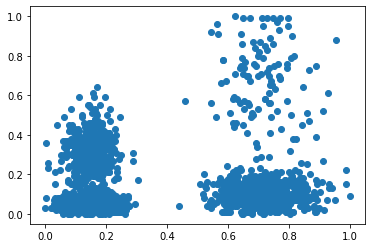

In [34]:
plt.scatter(df.mean_dist_day,df.mean_over_speed_perc)

In [35]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k,random_state=1234)
    km.fit(df[['mean_dist_day','mean_over_speed_perc']])
    sse.append(km.inertia_)

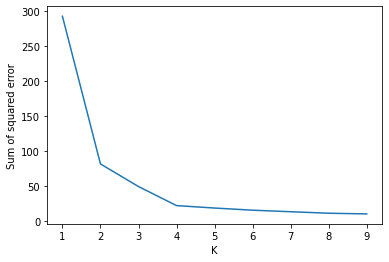

In [36]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [37]:
km = KMeans(n_clusters=4,random_state=1234)
yp = km.fit_predict(df[['mean_dist_day','mean_over_speed_perc']])
df['cluster'] = yp
df

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,0.243032,0.28,2
1,3423313212,0.161425,0.25,2
2,3423313724,0.213809,0.27,2
3,3423311373,0.175208,0.22,2
4,3423310999,0.170367,0.25,2
...,...,...,...,...
3995,3423310685,0.630348,0.10,1
3996,3423312600,0.700702,0.05,1
3997,3423312921,0.677760,0.12,1
3998,3423313630,0.700571,0.05,1


In [40]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

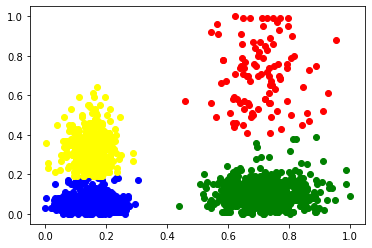

In [43]:
plt.scatter(df1['mean_dist_day'],df1['mean_over_speed_perc'],color='blue')
plt.scatter(df2['mean_dist_day'],df2['mean_over_speed_perc'],color='green')
plt.scatter(df3['mean_dist_day'],df3['mean_over_speed_perc'],color='yellow')
plt.scatter(df4['mean_dist_day'],df4['mean_over_speed_perc'],color='red')